In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Sample data
data = [
    {
        "activity": "walking",
        "gyroscope": [
            [0.05, 0.10, 0.15],
            [0.10, 0.15, 0.20],
            [0.15, 0.20, 0.25],
            [0.10, 0.15, 0.20],
            [0.05, 0.10, 0.15],
            [0.00, 0.05, 0.10],
        ],
        "accelerometer": [
            [0.8, 0.9, 1.2],  
            [0.9, 1.0, 1.3],  
            [1.0, 1.1, 1.4],
            [0.9, 1.0, 1.3],  
            [0.8, 0.9, 1.2],  
            [0.7, 0.8, 1.1],
        ],
    },
    {
        "activity": "running",
        "gyroscope": [
            [0.25, 0.30, 0.35],
            [0.30, 0.35, 0.40],
            [0.35, 0.40, 0.45],
            [0.30, 0.35, 0.40],
            [0.25, 0.30, 0.35],
            [0.20, 0.25, 0.30],
        ],
        "accelerometer": [
            [1.8, 1.9, 2.2],  
            [1.9, 2.0, 2.3],  
            [2.0, 2.1, 2.4],
            [1.9, 2.0, 2.3],  
            [1.8, 1.9, 2.2],  
            [1.7, 1.8, 2.1],
        ],
    },
    {
        "activity": "jumping",
        "gyroscope": [
            [0.45, 0.50, 0.55],
            [0.50, 0.55, 0.60],
            [0.55, 0.60, 0.65],
            [0.50, 0.55, 0.60],
            [0.45, 0.50, 0.55],
            [0.40, 0.45, 0.50],
        ],
        "accelerometer": [
            [2.8, 2.9, 3.2],  
            [2.9, 3.0, 3.3],  
            [3.0, 3.1, 3.4],
            [2.9, 3.0, 3.3],  
            [2.8, 2.9, 3.2],  
            [2.7, 2.8, 3.1],
        ],
    },
]


In [93]:
# convert data to dataframe
import pandas as pd

# convert 2d array to x, y, z columns, with time = index
def convert_to_df(data):
    df = pd.DataFrame()
    for d in data:
        accle_data = pd.DataFrame(d["accelerometer"], columns=["accelerometer_x", "accelerometer_y", "accelerometer_z"])
        accle_data["time"] = accle_data.index
        accle_data["activity"] = d["activity"]
        gyro_data = pd.DataFrame(d["gyroscope"], columns=["gyroscope_x", "gyroscope_y", "gyroscope_z"])
        gyro_data["time"] = gyro_data.index
        gyro_data["activity"] = d["activity"]
        df = pd.concat([df, accle_data, gyro_data], axis=0)
        df = df.groupby(["time", "activity"]).mean().reset_index()
        df = df.sort_values(by=["activity", "time"])
    return df

df = convert_to_df(data)
activities = df["activity"].unique()
df

,time,activity,accelerometer_x,accelerometer_y,accelerometer_z,gyroscope_x,gyroscope_y,gyroscope_z
0,0,jumping,2.8,2.9,3.2,0.45,0.50,0.55
3,1,jumping,2.9,3.0,3.3,0.50,0.55,0.60
6,2,jumping,3.0,3.1,3.4,0.55,0.60,0.65
9,3,jumping,2.9,3.0,3.3,0.50,0.55,0.60
12,4,jumping,2.8,2.9,3.2,0.45,0.50,0.55
15,5,jumping,2.7,2.8,3.1,0.40,0.45,0.50
1,0,running,1.8,1.9,2.2,0.25,0.30,0.35
4,1,running,1.9,2.0,2.3,0.30,0.35,0.40
7,2,running,2.0,2.1,2.4,0.35,0.40,0.45
10,3,running,1.9,2.0,2.3,0.30,0.35,0.40


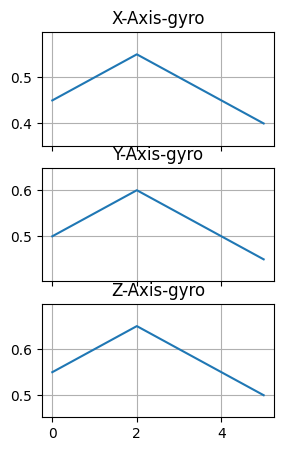

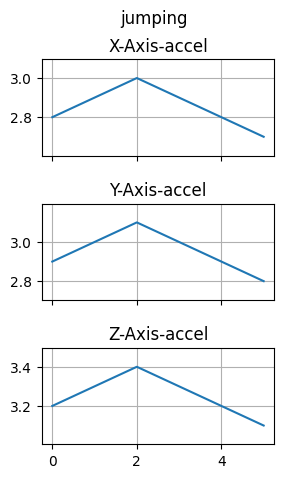

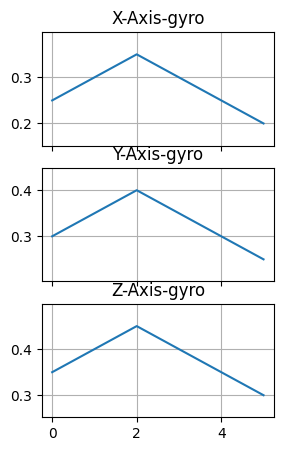

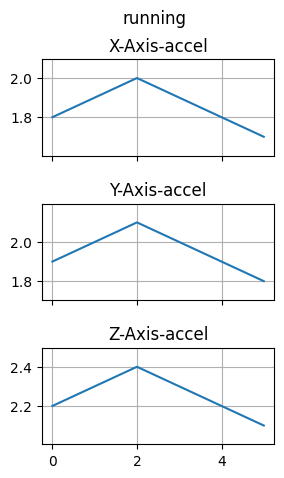

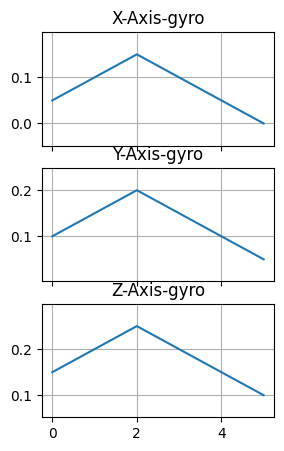

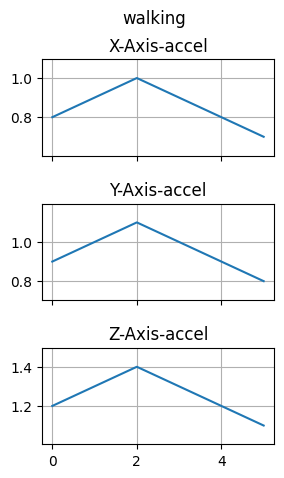

In [100]:
def plot_activity(activity, df):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharex=True, figsize=(3,5))
    plot_axis(ax0, df['time'], df['gyroscope_x'], "X-Axis-gyro")
    plot_axis(ax1, df['time'], df['gyroscope_y'], "Y-Axis-gyro")
    plot_axis(ax2, df['time'], df['gyroscope_z'], "Z-Axis-gyro")
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharex=True, figsize=(3,5))
    plot_axis(ax0, df['time'], df['accelerometer_x'], "X-Axis-accel")
    plot_axis(ax1, df['time'], df['accelerometer_y'], "Y-Axis-accel")
    plot_axis(ax2, df['time'], df['accelerometer_z'], "Z-Axis-accel")
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle(activity)
    plt.show()


def plot_axis(ax: plt.Axes, x, y, title):
    ax.plot(x, y)
    ax.set_title(title)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.grid(True)


for activity in activities:
    data_for_activity = df[df["activity"] == activity]
    plot_activity(activity, data_for_activity)

In [101]:
# add data label
label = LabelEncoder()
df["label"] = label.fit_transform(df["activity"])

# scaler = StandardScaler()
# gyro_X = df[["gyroscope"]]
# print(gyro_X)
# gyro_X = scaler.fit_transform(gyro_X)

In [67]:
import tensorflow as tf
from keras import Model
from keras._tf_keras.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM, Concatenate, Input

<KerasTensor shape=(None, 6, 3), dtype=float32, sparse=None, name=keras_tensor_6>
